In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [27]:
# Load Participant_Status table
cleaned_df = pd.read_csv('/home/yutika/Downloads/final_cleaned.csv')

In [28]:
cleaned_df.info()

cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32938 entries, 0 to 32937
Data columns (total 95 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  32938 non-null  int64  
 1   COHORT          32938 non-null  int64  
 2   ENROLL_DATE     32938 non-null  object 
 3   ENROLL_AGE      32938 non-null  float64
 4   ENRLPRKN        19396 non-null  float64
 5   ENRLSRDC        19396 non-null  float64
 6   ENRLHPSM        32938 non-null  int64  
 7   ENRLRBD         32938 non-null  int64  
 8   ENRLSNCA        32938 non-null  int64  
 9   ENRLGBA         32938 non-null  int64  
 10  SEX             32938 non-null  int64  
 11  CHLDBEAR        13147 non-null  float64
 12  SAAMethod       23158 non-null  object 
 13  SAA_Status      23158 non-null  object 
 14  SAA_Type        2565 non-null   object 
 15  InstrumentRep1  23158 non-null  float64
 16  PATNO           32936 non-null  float64
 17  NUPSOURC        32931 non-null 

,Participant_ID,COHORT,ENROLL_DATE,ENROLL_AGE,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLSNCA,ENRLGBA,...,NP4OFF,NP4OFFDEN,NP4OFFNUM,NP4OFFPCT,NP4FLCTI,NP4FLCTX,NP4DYSTN,NP4DYSTNDEN,NP4DYSTNNUM,NP4DYSTNPCT
0,3000,2,2011-02-01,69.1,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3001,1,2011-03-01,65.1,0.0,1.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3001,1,2011-03-01,65.1,0.0,1.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3001,1,2011-03-01,65.1,0.0,1.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3001,1,2011-03-01,65.1,0.0,1.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cleaned_df.drop(columns=['PATNO'],inplace=True)

In [6]:
cleaned_df.describe()

,Participant_ID,COHORT,ENROLL_AGE,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLSNCA,ENRLGBA,SEX,...,NP4OFF,NP4OFFDEN,NP4OFFNUM,NP4OFFPCT,NP4FLCTI,NP4FLCTX,NP4DYSTN,NP4DYSTNDEN,NP4DYSTNNUM,NP4DYSTNPCT
count,32938.000000,32938.000000,32938.000000,19396.000000,19396.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,...,6313.000000,6.000000,6.0,6.000000,6313.000000,6313.000000,6313.000000,6.0,6.000000,2.0
mean,31563.654411,1.675087,61.744286,0.000980,0.549546,0.047240,0.042322,0.029844,0.071164,0.598184,...,0.385870,0.666667,18.0,3.666667,0.405037,0.324885,0.263741,0.0,0.666667,0.0
std,56237.353929,1.209645,9.714951,0.031284,0.497552,0.212156,0.201326,0.170159,0.257103,0.490272,...,0.741665,1.032796,0.0,5.680376,0.839205,0.707853,0.696937,0.0,1.032796,0.0
min,3000.000000,1.000000,26.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,3417.000000,1.000000,55.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,3904.000000,1.000000,62.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,18.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,42014.000000,1.000000,68.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.500000,18.0,8.250000,0.000000,0.000000,0.000000,0.0,1.500000,0.0
max,402314.000000,4.000000,89.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,2.000000,18.0,11.000000,4.000000,4.000000,4.000000,0.0,2.000000,0.0


In [7]:
pd.set_option('display.max_rows', None) 

cleaned_df.isnull().sum()

Participant_ID        0
COHORT                0
ENROLL_DATE           0
ENROLL_AGE            0
ENRLPRKN          13542
ENRLSRDC          13542
ENRLHPSM              0
ENRLRBD               0
ENRLSNCA              0
ENRLGBA               0
SEX                   0
CHLDBEAR          19791
SAAMethod          9780
SAA_Status         9780
SAA_Type          30373
InstrumentRep1     9780
NUPSOURC              7
NP1COG                6
NP1HALL               6
NP1DPRS               6
NP1ANXS               6
NP1APAT               6
NP1DDS                6
NP1SLPN              33
NP1SLPD              33
NP1PAIN               6
NP1URIN               6
NP1CNST               6
NP1LTHD               6
NP1FATG               6
NP2SPCH               6
NP2SALV               7
NP2SWAL               7
NP2EAT                7
NP2DRES               7
NP2HYGN              25
NP2HWRT              25
NP2HOBB              25
NP2TURN               7
NP2TRMR               7
NP2RISE               7
NP2WALK         

In [8]:
target_col = 'COHORT'
cleaned_df.drop(columns=['COHORT'], inplace=True)

In [9]:

# Total number of rows to calculate missing value percentages
total_rows = cleaned_df.shape[0]

threshold = 0.5
cols_to_drop = [col for col in cleaned_df.columns if cleaned_df[col].isnull().mean() > threshold]
df = cleaned_df.drop(columns=cols_to_drop)
print(f"Dropped columns with > 50% missing values: {cols_to_drop}")



Dropped columns with > 50% missing values: ['CHLDBEAR', 'SAA_Type', 'DYSKIRAT', 'NP4WDYSK', 'NP4WDYSKDEN', 'NP4WDYSKNUM', 'NP4WDYSKPCT', 'NP4DYSKI', 'NP4OFF', 'NP4OFFDEN', 'NP4OFFNUM', 'NP4OFFPCT', 'NP4FLCTI', 'NP4FLCTX', 'NP4DYSTN', 'NP4DYSTNDEN', 'NP4DYSTNNUM', 'NP4DYSTNPCT']


In [10]:
# Example: Setting a threshold of unique values to identify potential categorical columns
threshold = 7  # Define a threshold based on knowledge of the data
categorical_cols = [col for col in df.columns if df[col].nunique() < threshold]
print(categorical_cols)

['ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLSNCA', 'ENRLGBA', 'SEX', 'SAAMethod', 'SAA_Status', 'InstrumentRep1', 'NUPSOURC', 'NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES']


In [11]:
for col in df.columns:
    unique_count = df[col].nunique()
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}\n")


Column: Participant_ID
  Number of unique values: 3737
  Unique values: [  3000   3001   3002 ... 386466 388122 402314]

Column: ENROLL_DATE
  Number of unique values: 160
  Unique values: ['2011-02-01' '2011-03-01' '2011-04-01' '2011-05-01' '2011-06-01'
 '2011-07-01' '2011-11-01' '2011-12-01' '2012-02-01' '2012-04-01'
 '2012-05-01' '2012-06-01' '2012-09-01' '2012-11-01' '2013-01-01'
 '2013-03-01' '2013-04-01' '2010-10-01' '2010-12-01' '2011-08-01'
 '2011-09-01' '2012-03-01' '2012-07-01' '2012-10-01' '2012-12-01'
 '2012-08-01' '2010-11-01' '2012-01-01' '2013-05-01' '2011-01-01'
 '2011-10-01' '2013-02-01' '2010-07-01' '2010-08-01' '2010-09-01'
 '2019-05-01' '2019-06-01' '2019-07-01' '2019-08-01' '2019-10-01'
 '2019-11-01' '2020-01-01' '2020-02-01' '2014-09-01' '2013-10-01'
 '2014-08-01' '2014-02-01' '2014-11-01' '2014-04-01' '2013-12-01'
 '2014-06-01' '2014-10-01' '2015-01-01' '2015-03-01' '2016-04-01'
 '2017-12-01' '2015-08-01' '2015-10-01' '2014-03-01' '2014-05-01'
 '2015-06-01' '2017

Column: ENRLSRDC
  Number of unique values: 2
  Unique values: [ 0.  1. nan]

Column: ENRLHPSM
  Number of unique values: 2
  Unique values: [0 1]

Column: ENRLRBD
  Number of unique values: 2
  Unique values: [0 1]

Column: ENRLSNCA
  Number of unique values: 2
  Unique values: [0 1]

Column: ENRLGBA
  Number of unique values: 2
  Unique values: [0 1]

Column: SEX
  Number of unique values: 2
  Unique values: [0 1]

Column: SAAMethod
  Number of unique values: 2
  Unique values: [nan 'Amprion-Alpha-synuclein-SAA' 'Amprion-24h alpha-synuclein-SAA']

Column: SAA_Status
  Number of unique values: 3
  Unique values: [nan 'Positive' 'Negative' 'Inconclusive']

Column: InstrumentRep1
  Number of unique values: 5
  Unique values: [nan  2.  4.  6.  9. 10.]

Column: NUPSOURC
  Number of unique values: 3
  Unique values: [ 1.  3. nan  2.]

Column: NP1COG
  Number of unique values: 5
  Unique values: [ 1.  0.  2.  3. nan  4.]

Column: NP1HALL
  Number of unique values: 4
  Unique values: [ 0.  1

In [12]:
# Separate categorical and numerical columns for different preprocessing steps
numerical_cols = [col for col in df.columns if (col not in categorical_cols and df[col].dtype in ['int64', 'float64'])]



# a. Handle Missing Values
# Impute minimal missing values (< 5%) with median for numerical and mode for categorical data
numerical_cols_minimal_missing = [col for col in numerical_cols if df[col].isnull().mean() < 0.05]
categorical_cols_minimal_missing = [col for col in categorical_cols if df[col].isnull().mean() < 0.05]

# Impute numerical columns with the median
for col in numerical_cols_minimal_missing:
    median_value = df[col].median()  # Calculate median
    df[col] = df[col].fillna(median_value)  # Impute missing values with the median

# Impute categorical columns with the mode
for col in categorical_cols_minimal_missing:
    mode_value = df[col].mode()[0]  # Calculate mode (mode() returns a series, so take the first value)
    df[col] = df[col].fillna(mode_value)  # Impute missing values with the mode




In [13]:
df.isnull().sum()

Participant_ID        0
ENROLL_DATE           0
ENROLL_AGE            0
ENRLPRKN          13542
ENRLSRDC          13542
ENRLHPSM              0
ENRLRBD               0
ENRLSNCA              0
ENRLGBA               0
SEX                   0
SAAMethod          9780
SAA_Status         9780
InstrumentRep1     9780
NUPSOURC              0
NP1COG                0
NP1HALL               0
NP1DPRS               0
NP1ANXS               0
NP1APAT               0
NP1DDS                0
NP1SLPN               0
NP1SLPD               0
NP1PAIN               0
NP1URIN               0
NP1CNST               0
NP1LTHD               0
NP1FATG               0
NP2SPCH               0
NP2SALV               0
NP2SWAL               0
NP2EAT                0
NP2DRES               0
NP2HYGN               0
NP2HWRT               0
NP2HOBB               0
NP2TURN               0
NP2TRMR               0
NP2RISE               0
NP2WALK               0
NP2FREZ               0
NP3SPCH               0
NP3FACXP        

In [14]:
# Drop columns with high correlation (> 90%)
correlation_matrix = df[numerical_cols].corr().abs()  # Calculate absolute correlation matrix
upper_triangle = correlation_matrix.where(
    ~np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)  # Get upper triangle of the correlation matrix
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]
print(to_drop)


['Participant_ID', 'ENROLL_AGE', 'NHY']


In [15]:

# Identify columns with 5-50% missing values
numerical_cols_knn_impute = [col for col in numerical_cols if 0.05 <= df[col].isnull().mean() <= 0.5]
categorical_cols_knn_impute = [col for col in categorical_cols if 0.05 <= df[col].isnull().mean() <= 0.5]

# Define the KNN imputer for both numerical and categorical columns
knn_imputer = KNNImputer(n_neighbors=5)

# Encoding and Scaling
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = StandardScaler()
for col in ["SAAMethod", "SAA_Status"]:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))
# Apply transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_impute_num', knn_imputer, numerical_cols_knn_impute),  # Apply KNN imputation to numerical columns with 5-50% missing values
        ('knn_impute_cat', knn_imputer, categorical_cols_knn_impute),  # Apply KNN imputation to categorical columns with 5-50% missing values
        ('one_hot', one_hot_encoder, categorical_cols),  # One-hot encode categorical features
        ('scaler', scaler, numerical_cols)  # Standardize numerical features
    ],
    remainder='drop'
)

# Build the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing transformations to the dataset
df_preprocessed = pipeline.fit_transform(df)

# Print success message
print("Data preprocessing complete.")


Data preprocessing complete.


In [39]:
df_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,0.0,0.0,2.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507920,0.757165,-0.931269
1,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507902,0.345423,-0.253537
2,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507902,0.345423,0.424194
3,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507902,0.345423,-0.253537
4,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507902,0.345423,0.424194


In [ ]:
#df_preprocessed = pd.DataFrame(df_preprocessed.toarray())
X = df_preprocessed.drop(df_preprocessed.columns[2], axis=1) # Dropping the target column
y = df_preprocessed.iloc[:, 2]  # Defining the target column as COHORT


print(f"Shape of X (features): {X.shape}")
print(f"Length of y (target): {len(y)}")



Shape of X (features): (32938, 277)
Length of y (target): 32938


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Initialize LDA model with desired number of components
lda = LDA(n_components=2)  # Change to appropriate number based on your data
X_lda = lda.fit_transform(X, y)


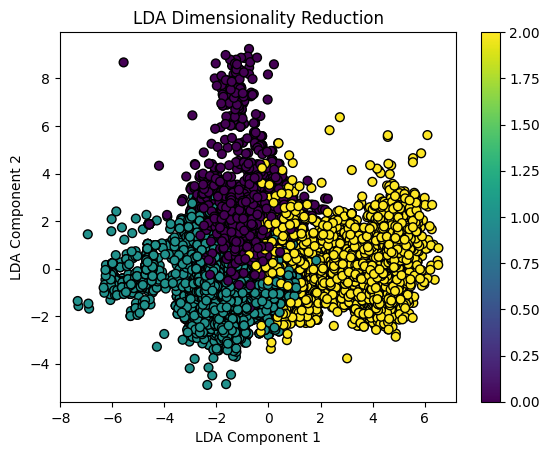

In [47]:
import matplotlib.pyplot as plt

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Dimensionality Reduction')
plt.colorbar()
plt.show()
